In [1]:
import pickle
import numpy as np

pickle_in = open("X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("y_train.pickle","rb")
y_train = pickle.load(pickle_in)

X_train = np.array(X_train/255.0)
y_train = np.array(y_train)

pickle_in = open("X_test.pickle","rb") 
X_test = pickle.load(pickle_in)

pickle_in = open("y_test.pickle","rb") 
y_test = pickle.load(pickle_in)

X_test = np.array(X_test/255.0) 
y_test = np.array(y_test)

In [2]:
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import os
import seaborn as sns
import tensorflow as tf

In [3]:
feature_extractor = tf.keras.models.Sequential()


feature_extractor.add( tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=X_train.shape[1:] ))


feature_extractor.add( tf.keras.layers.MaxPool2D(pool_size=2, strides=2 ))


feature_extractor.add( tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu' ))
feature_extractor.add( tf.keras.layers.MaxPool2D(pool_size=2, strides=2 ))


feature_extractor.add( tf.keras.layers.Flatten())

In [4]:
feature_extractor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 43808)             0         
Total params: 9,568
Trainable params: 9,568
Non-trainable params: 0
_________________________________________________________________


In [5]:
X_for_training = feature_extractor.predict(X_train) #This is out X input to RF
#X_for_training = feature_extractor.reshape(feature_extractor.shape[0], -1)

In [6]:
#XGBOOST
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_for_training, y_train)

C:\ProgramData\Anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:29:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [7]:
#Send test data through same feature extractor process
X_test_feature = feature_extractor.predict(X_test)
#X_test_feature = X_test_feature.reshape(X_test_feature.shape[0], -1)

In [8]:
#Now predict using the trained RF model. 
prediction = model.predict(X_test_feature)

In [9]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction))

Accuracy =  0.9093851132686084


<AxesSubplot:>

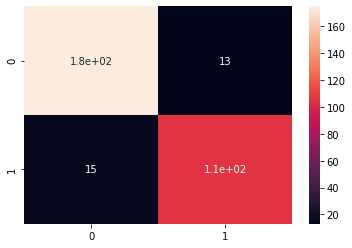

In [10]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, prediction)
#print(cm)
sns.heatmap(cm, annot=True)

The prediction for this image is:  1
The actual label for this image is:  1


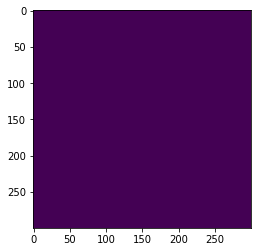

In [11]:
import matplotlib.pyplot as plt
#Check results on a few select images
n=np.random.randint(0, X_test.shape[0])
img = X_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=feature_extractor.predict(input_img)
#input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction = model.predict(input_img_feature)[0] 
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", y_test[n])